<a href="https://colab.research.google.com/github/GBakalkinOAI/DDLS2024/blob/main/DSarkisyan_Module_1_lab_1_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This corresponds to https://chatgpt.com/share/c469a8d7-d212-4172-b5a0-fc579ebca0e5

In [ ]:
print("Hello, World!")

Hello, World!


In [ ]:
import numpy as np

arr = np.arange(5)
arr **= 2
print(arr)

[ 0  1  4  9 16]


In [ ]:
arr.reshape((5,1))

array([[ 0],
       [ 1],
       [ 4],
       [ 9],
       [16]])

In [ ]:
arr.sum()

30

In [ ]:
arr *= 3
print(arr)

[ 0  3 12 27 48]


In [ ]:
!pip install torch

In [ ]:
import torch

In [ ]:
# Create a tensor with values [2, 4, 6, 8, 10].
t_a = torch.arange(2,12,2)
print(t_a)

# Create another tensor with any values of your choice.
t_b = torch.arange(10)

# Perform subtraction and division on these tensors.
print("tensors subtraction:", t_b[:5] - t_a)
print("tensors division:", t_b[:5] / t_a)

# Reshape one of the tensors into a different shape (e.g., from a vector to a matrix).
print("from vectors to matrix by reshaping and broadcasting:\n", t_b.reshape(1, 10) - t_a.reshape(5, 1))

tensor([ 2,  4,  6,  8, 10])
tensors subtraction: tensor([-2, -3, -4, -5, -6])
tensors division: tensor([0.0000, 0.2500, 0.3333, 0.3750, 0.4000])
from vectors to matrix by reshaping and broadcasting:
 tensor([[ -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7],
        [ -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5],
        [ -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3],
        [ -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1],
        [-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1]])


Precision and Recall: Precision is the proportion of true positive predictions among all positive predictions, while recall is the proportion of true positive predictions among all actual positives.

F1-Score: The harmonic mean of precision and recall, useful when dealing with imbalanced datasets.

Batch Gradient Descent: Uses the entire dataset to compute the gradient and update parameters.

I asked chatGPT to explore Mini-Batch Gradient Descent. Later I will cut this brach to stay on track.

In [ ]:
np.linspace(0, 10, 5).reshape(-1, 1)

array([[ 0. ],
       [ 2.5],
       [ 5. ],
       [ 7.5],
       [10. ]])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [ ]:
# Generate synthetic data
np.random.seed(0)
torch.manual_seed(0)

# Features
X = np.linspace(0, 10, 100).reshape(-1, 1)
# Linear relation: y = 2*X + noise
y = 2 * X + np.random.normal(0, 1, X.shape)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# Parameters
batch_size = 10
epochs = 2000

# Create DataLoader
dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(epochs):
    for batch_X, batch_y in data_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/2000], Loss: 1.2152
Epoch [200/2000], Loss: 1.5072
Epoch [300/2000], Loss: 1.0421
Epoch [400/2000], Loss: 1.9534
Epoch [500/2000], Loss: 1.6704
Epoch [600/2000], Loss: 0.3629
Epoch [700/2000], Loss: 0.8151
Epoch [800/2000], Loss: 0.5694
Epoch [900/2000], Loss: 0.5306
Epoch [1000/2000], Loss: 1.2017
Epoch [1100/2000], Loss: 1.0877
Epoch [1200/2000], Loss: 0.7224
Epoch [1300/2000], Loss: 1.8996
Epoch [1400/2000], Loss: 0.9529
Epoch [1500/2000], Loss: 0.5900
Epoch [1600/2000], Loss: 0.9523
Epoch [1700/2000], Loss: 0.8510
Epoch [1800/2000], Loss: 0.8350
Epoch [1900/2000], Loss: 0.8303
Epoch [2000/2000], Loss: 1.7005


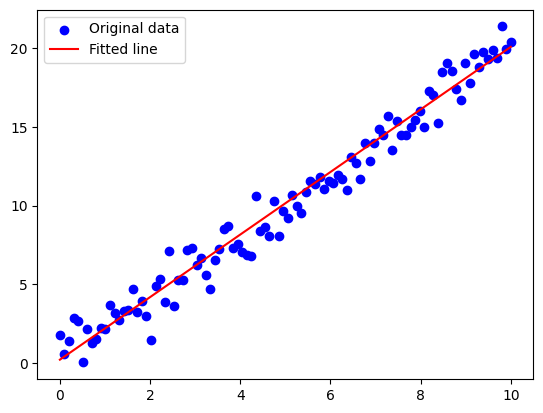

In [ ]:
# Predictions
with torch.no_grad():
    predictions = model(X_tensor).numpy()

# Display a few predictions
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, predictions, color='red', label='Fitted line')
plt.legend()
plt.show()


In [ ]:
np.random.normal(loc=[2, 2], scale=0.5, size=(10, 2))

array([[2.94157535, 1.32612047],
       [1.3647575 , 2.48469835],
       [1.4134383 , 2.97181059],
       [1.79319051, 1.62627259],
       [2.96147101, 2.7402574 ],
       [2.93377948, 2.45302233],
       [1.56938716, 2.95503248],
       [1.86599831, 2.4012282 ],
       [2.47362598, 1.92249495],
       [2.30703969, 2.46110334]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


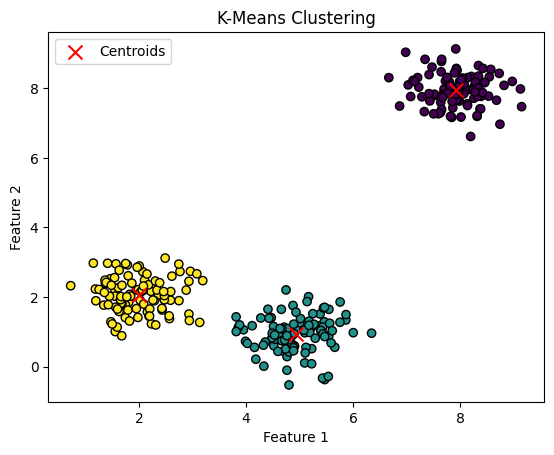

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.vstack([
    np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2)),
    np.random.normal(loc=[8, 8], scale=0.5, size=(100, 2)),
    np.random.normal(loc=[5, 1], scale=0.5, size=(100, 2))
])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
#print(iris)
X, y = iris.data, iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a simple model
# model = LogisticRegression(max_iter=2000)
model = LogisticRegression(penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,  # Adjust l1_ratio between 0 (l2) and 1 (l1) as needed
    tol=1e-4,
    max_iter=2000
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98


In [ ]:
import pandas as pd

# Load Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Display the first few rows of the DataFrame
print("First few rows of the Iris dataset:")
print(df.head())

# Print dataset metadata
print("\nIris dataset metadata:")
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"Number of samples: {len(iris.data)}")
print(f"Number of features: {iris.data.shape[1]}")
print(f"Target values (unique): {set(iris.target)}")

# Explain the dataset
print("\nDataset Explanation:")
print("Features:")
for feature in iris.feature_names:
    print(f"  - {feature}")

print("\nTarget Classes:")
for idx, target in enumerate(iris.target_names):
    print(f"  - Class {idx}: {target}")


First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Iris dataset metadata:
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Number of samples: 150
Number of features: 4
Target values (unique): {0, 1, 2}

Dataset Explanation:
Features:
  - sepal length (cm)
  - sepal width (cm)
  - petal length (cm)
  - petal width (cm)

Target Classes:
  - Class 0: setosa
  - Class 1

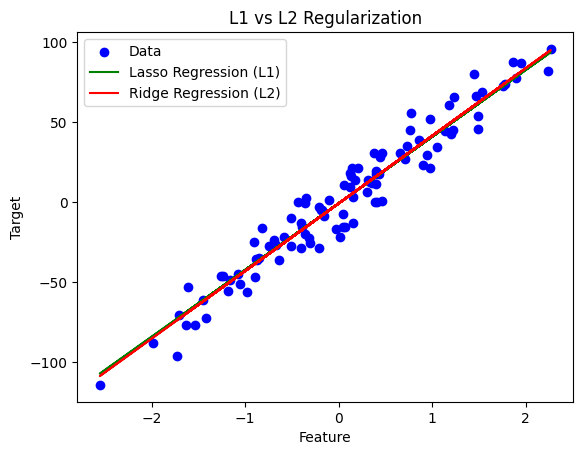

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Define models with L1 and L2 regularization
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

# Fit models
lasso.fit(X, y)
ridge.fit(X, y)

# Plotting
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, lasso.predict(X), color='green', label='Lasso Regression (L1)')
plt.plot(X, ridge.predict(X), color='red', label='Ridge Regression (L2)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('L1 vs L2 Regularization')
plt.legend()
plt.show()

Topic 8

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 26508596.25it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1024394.67it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3985918.47it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3265431.74it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/5, Loss: 0.1536
Epoch 2/5, Loss: 0.0448
Epoch 3/5, Loss: 0.0317
Epoch 4/5, Loss: 0.0225
Epoch 5/5, Loss: 0.0172
Accuracy: 99.14%


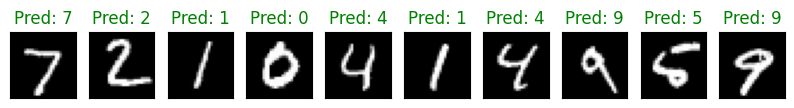

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data loading and transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64*7*7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

# Visualize some test images and predictions
dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig = plt.figure(figsize=(10, 10))
for index in range(10):
    ax = fig.add_subplot(1, 10, index+1, xticks=[], yticks=[])
    plt.imshow(images[index].numpy().squeeze(), cmap='gray')
    ax.set_title(f'Pred: {predicted[index].item()}', color='green')
plt.show()


In [ ]:
print( test_data )

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

my_input_x_y_size = 32

# Data loading and transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * (my_input_x_y_size // 2) * (my_input_x_y_size // 2), 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * (my_input_x_y_size // 2) * (my_input_x_y_size // 2))
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

# Visualize some test images and predictions
dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig = plt.figure(figsize=(10, 10))
for index in range(10):
    ax = fig.add_subplot(1, 10, index+1, xticks=[], yticks=[])
    plt.imshow(images[index].numpy().squeeze(), cmap='gray')
    ax.set_title(f'Pred: {predicted[index].item()}', color='green')
plt.show()


RuntimeError: shape '[-1, 16384]' is invalid for input of size 200704

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data loading and transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*8*8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64*8*8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

# Visualize some test images and predictions
dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig = plt.figure(figsize=(10, 10))
for index in range(10):
    ax = fig.add_subplot(1, 10, index+1, xticks=[], yticks=[])
    plt.imshow(images[index].numpy().squeeze(), cmap='gray')
    ax.set_title(f'Pred: {predicted[index].item()}', color='green')
plt.show()


ValueError: Expected input batch_size (49) to match target batch_size (64).